In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
from wind_tools import *

proc_dir = Path("/run/media/simone/Simone DATI/TRISONICA_DATA/Processed/")
wm1_path = proc_dir / "WM1_ago_sept" / "eddypro_WM1_full_output_2019-12-20T105458_exp.csv"
root_dir = Path("test_data/test_rot")
raw_p = Path("test_data/20180809-2030_WM_174605_com1.raw")

proc_series_name = "20180809-2100_raw_dataset_2020-01-20T185022_adv.txt"


In [3]:
%matplotlib 

Using matplotlib backend: Qt5Agg


In [3]:
n_samples = 30 / 5

wind_df = pd.read_csv(raw_p, usecols=(0,2,3,4,6), names=['tstmp','u', 'v', 'w', 't'], header=None)

In [5]:
wind_df

,tstmp,u,v,w,t
0,203000,0.13,0.20,0.20,28.33
1,203000,0.06,0.18,0.16,28.35
2,203000,0.05,0.19,0.15,28.38
3,203000,0.10,0.18,0.20,28.43
4,203000,0.23,0.13,0.22,28.47
...,...,...,...,...,...
18001,205959,0.43,0.55,0.18,27.52
18002,205959,0.32,0.69,-0.04,27.50
18003,205959,0.36,0.54,-0.08,27.52
18004,205959,0.53,0.48,-0.28,27.50


In [6]:
wind_df.describe()

,tstmp,u,v,w,t
count,18006.000000,18006.000000,18006.000000,18006.000000,18006.000000
mean,204479.857770,0.247699,0.310869,-0.016067,27.946013
std,866.650933,0.477576,0.431987,0.311568,0.227592
min,203000.000000,-1.320000,-1.540000,-1.530000,27.170000
25%,203730.000000,-0.100000,0.070000,-0.210000,27.790000
50%,204500.000000,0.250000,0.380000,0.020000,27.970000
75%,205229.750000,0.610000,0.600000,0.190000,28.140000
max,210000.000000,1.960000,1.590000,1.020000,28.470000


In [45]:
add_wind_speed(wind_df.mean())

tstmp         204479.857770
u                  0.247699
v                  0.310869
w                 -0.016067
t                 27.946013
wind_speed         0.397809
dtype: float64

In [113]:
raw_idx = pd.timedelta_range(start="20180809203000", end="20180809210000", periods=18006)

In [115]:
wind_df = wind_df.set_index(raw_idx); wind_df

,tstmp,u,v,w,t
05:36:20.809203,203000,0.13,0.20,0.20,28.33
05:36:20.809203,203000,0.06,0.18,0.16,28.35
05:36:20.809203,203000,0.05,0.19,0.15,28.38
05:36:20.809203,203000,0.10,0.18,0.20,28.43
05:36:20.809203,203000,0.23,0.13,0.22,28.47
...,...,...,...,...,...
05:36:20.809209,205959,0.43,0.55,0.18,27.52
05:36:20.809209,205959,0.32,0.69,-0.04,27.50
05:36:20.809209,205959,0.36,0.54,-0.08,27.52
05:36:20.809209,205959,0.53,0.48,-0.28,27.50


In [151]:
wind_df.describe()

,tstmp,u,v,w,t
count,18006.000000,18006.000000,18006.000000,18006.000000,18006.000000
mean,204479.857770,0.247699,0.310869,-0.016067,27.946013
std,866.650933,0.477576,0.431987,0.311568,0.227592
min,203000.000000,-1.320000,-1.540000,-1.530000,27.170000
25%,203730.000000,-0.100000,0.070000,-0.210000,27.790000
50%,204500.000000,0.250000,0.380000,0.020000,27.970000
75%,205229.750000,0.610000,0.600000,0.190000,28.140000
max,210000.000000,1.960000,1.590000,1.020000,28.470000


In [109]:
wind_df.resample('100ms').mean()

,tstmp,u,v,w,t
20:30:00,203000,0.095,0.19,0.18,28.34
20:30:00.100000,203000,0.050,0.19,0.15,28.38
20:30:00.200000,203000,0.100,0.18,0.20,28.43
20:30:00.300000,203000,0.230,0.13,0.22,28.47
20:30:00.400000,203000,0.280,0.26,0.28,28.47
...,...,...,...,...,...
20:59:59.600000,205959,0.430,0.55,0.18,27.52
20:59:59.700000,205959,0.320,0.69,-0.04,27.50
20:59:59.800000,205959,0.360,0.54,-0.08,27.52
20:59:59.900000,205959,0.530,0.48,-0.28,27.50


# Open raw EP datasets

In [8]:
def open_ep_level(root_dir, level, fname):
    path = root_dir / f"eddypro_raw_datasets/level_{level}" / fname
    return pd.read_csv(path, skiprows=9, sep=' ', skipinitialspace=True, index_col=False)

In [9]:
wm1l1 = open_ep_level(root_dir, 1, proc_series_name)

In [10]:
wm1l1.describe()

,u,v,w,ts
count,18000.000000,18000.000000,18000.000000,18000.000000
mean,0.247627,0.310791,-0.016058,301.096155
std,0.477635,0.432036,0.311587,0.227485
min,-1.320000,-1.540000,-1.530000,300.320007
25%,-0.100000,0.070000,-0.210000,300.940002
50%,0.250000,0.380000,0.020000,301.119995
75%,0.610000,0.600000,0.190000,301.289978
max,1.960000,1.590000,1.020000,301.619995


In [43]:
add_wind_speed(wm1l1).max()

u               1.960000
v               1.590000
w               1.020000
ts            301.619995
wind_speed      2.595804
dtype: float64

In [37]:
wm1l = []
for i in range(1,8):
    wm1l.append(open_ep_level(root_dir, i, proc_series_name))

In [ ]:
[(f"level{i}", wm1l[i].describe()) for i in range(7)]

In [17]:
wm1l1.mean().pipe(add_wind_speed)

warning add_wind_dir is not the same of EddyPro


u               0.247627
v               0.310791
w              -0.016058
ts            301.096155
wind_speed      0.397703
wind_dir       51.453481
dtype: float64

In [24]:
def wind_dir(df, offset=0):
    """try to mimic behaviour of EP SingleWindDirection"""
    return (180 - np.rad2deg(np.arctan2(df.v, df.u)) + offset) % 360 

In [62]:
def SingleWindDirection(wind, offset=0):
    u, v, w = range(3) # for better name of wind variables    
    wind_dir = 180 - (np.arctan2(wind[v], wind[u]) *180 / np.pi)
    if wind_dir >= 360: wind_dir = wind_dir - 360
    if wind_dir < 0: wind_dir = 360 + wind_dir
    return wind_dir

In [63]:
wind_dir(wm1l1.iloc[0])

123.02386620536382

In [64]:
SingleWindDirection(wm1l1.iloc[0])

123.02386620536382

In [20]:
def angular_average(ar):
    ar = np.deg2rad(ar)
    x = (-np.cos(ar)).sum()
    y = (-np.sin(ar)).sum()
    return np.rad2deg(np.arctan2(y,x)) + 180

In [22]:
wm1wd1 = wind_dir(wm1l1); wm1wd1

0        123.023866
1        108.434948
2        104.743563
3        119.054603
4        150.524112
            ...    
17995    131.121476
17996    132.089162
17997    133.667779
17998    137.060111
17999    134.501789
Length: 18000, dtype: float64

In [27]:
angular_average(wm1wd1)

120.16902208140151

### rotate this ... well even if it is not rotated at all ...

In [4]:
def rotate_matrix(df, ang):
    ang = np.deg2rad(ang)
    rot_mat = np.array([[np.cos(ang), -np.sin(ang)],
                       [np.sin(ang), np.cos(ang)]])
    return np.matmul(df[['u', 'v']], rot_mat)

In [5]:
def rotate_ang(df, ang):
    wind_dir, wind_speed = cart2pol(df.u, df.v)
    wind_dir += np.deg2rad(ang)
    return pol2cart(wind_dir, wind_speed)

In [26]:
wd1rot = pd.concat(rotate_ang(wind_df, -310), axis=1).rename(columns={0:"u",1:"v"})

In [27]:
wd1rot.describe()

,u,v
count,18006.000000,18006.000000
mean,-0.078921,0.389571
std,0.340697,0.546459
min,-1.446512,-1.594710
25%,-0.303760,0.006693
50%,-0.085312,0.449461
75%,0.114038,0.796736
max,2.153141,1.869254


In [8]:
wind_df.describe()

,tstmp,u,v,w,t
count,18006.000000,18006.000000,18006.000000,18006.000000,18006.000000
mean,204479.857770,0.247699,0.310869,-0.016067,27.946013
std,866.650933,0.477576,0.431987,0.311568,0.227592
min,203000.000000,-1.320000,-1.540000,-1.530000,27.170000
25%,203730.000000,-0.100000,0.070000,-0.210000,27.790000
50%,204500.000000,0.250000,0.380000,0.020000,27.970000
75%,205229.750000,0.610000,0.600000,0.190000,28.140000
max,210000.000000,1.960000,1.590000,1.020000,28.470000


In [25]:
angular_average(wind_dir(wd1rot))

70.17741426693152

In [29]:
rotate_matrix(wind_df, 310).pipe(wind_dir).pipe(angular_average)

70.17741426693152

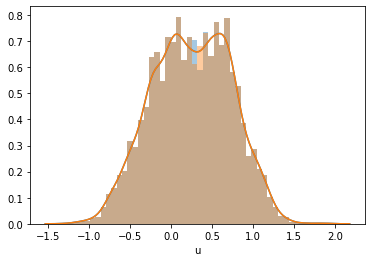

dropping 6 random elements from wind_df in order to make possible to have a scatter ot the two series, not an really good hack

In [126]:
# cioè fa proprio pena, ma parecchio pure
wind_dfd = wind_df.drop(wind_df.sample(6).index); wind_dfd.describe()

,tstmp,u,v,w,t
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,204479.819833,0.247646,0.310864,-0.016089,27.946027
std,866.726403,0.477551,0.431918,0.311536,0.227585
min,203000.000000,-1.320000,-1.540000,-1.530000,27.170000
25%,203729.000000,-0.100000,0.070000,-0.210000,27.790000
50%,204500.000000,0.250000,0.380000,0.020000,27.970000
75%,205230.000000,0.610000,0.600000,0.190000,28.140000
max,210000.000000,1.960000,1.590000,1.020000,28.470000


In [134]:
plot_components_scatter(wm1l1, wm1l1, "w")

In [144]:
(wind_df - wm1l1)[['u','v','w']].pow(2).mean()

u    1.922602e-16
v    1.817678e-16
w    6.200459e-17
dtype: float64

In [147]:
wind_df.describe()

,tstmp,u,v,w,t
count,18006.000000,18006.000000,18006.000000,18006.000000,18006.000000
mean,204479.857770,0.247699,0.310869,-0.016067,27.946013
std,866.650933,0.477576,0.431987,0.311568,0.227592
min,203000.000000,-1.320000,-1.540000,-1.530000,27.170000
25%,203730.000000,-0.100000,0.070000,-0.210000,27.790000
50%,204500.000000,0.250000,0.380000,0.020000,27.970000
75%,205229.750000,0.610000,0.600000,0.190000,28.140000
max,210000.000000,1.960000,1.590000,1.020000,28.470000


In [148]:
wm1l1.describe()

,u,v,w,ts
count,18000.000000,18000.000000,18000.000000,18000.000000
mean,0.247627,0.310791,-0.016058,301.096155
std,0.477635,0.432036,0.311587,0.227485
min,-1.320000,-1.540000,-1.530000,300.320007
25%,-0.100000,0.070000,-0.210000,300.940002
50%,0.250000,0.380000,0.020000,301.119995
75%,0.610000,0.600000,0.190000,301.289978
max,1.960000,1.590000,1.020000,301.619995


In [72]:
wind_df = add_wind_speed(wind_df)
wind_df = add_wind_dir(wind_df)

warning add_wind_dir is not the same of EddyPro


In [81]:
plt.plot(wind_df[:3000].wind_dir, color="lightblue")
plt.plot(wind_df[:3000].wind_dir, marker="o", linestyle="", color="green")

In [8]:
def get__wind_dir_pd(df, offset=0): return (180 - np.rad2deg(np.arctan2(df.v, df.u)) + offset) % 360

In [9]:
#trying to reimplement as closely as possible EP implementation of SingleWindDirection
def get_wind_dir(ar, offset=0): return (180 - np.rad2deg(np.arctan2(ar[:,1], ar[:,0])) + offset) % 360

In [54]:
#fake wind data for testing
tw = 10 *np.random.random((10000,2)) -1
tw, tw.mean(), tw.std(), tw.min(), tw.max()

(array([[ 6.506737  ,  1.51233371],
        [ 2.79833112, -0.46786261],
        [ 7.64566602,  6.76923138],
        ...,
        [ 5.80804322,  7.71459353],
        [ 1.12022834,  0.91787389],
        [ 4.78723927,  1.05812879]]),
 3.9560230471959184,
 2.893551775360677,
 -0.9998883895405044,
 8.998797696709211)

In [10]:
wind = wind_df[['u', 'v']].to_numpy()

In [12]:
wd = get_wind_dir(wind); wd

array([123.02386756, 108.43494882, 104.74356284, ..., 123.69006753,
       137.83411102, 140.52754015])

In [ ]:
def fix_quadrant(wd): return (180 - wd)%360

In [58]:
def get_mean_wind_dir(wd):
    # not dividing by len(wind_dir) due to atan2
    # correct back to correct quadrant ...following ep 
    wd = (180 - wd) % 360 
    wd = np.deg2rad(wd)
    u = np.cos(wd)
    v = np.sin(wd)
    cossum = u.sum() 
    sinsum = v.sum() 
    return np.rad2deg(np.arctan2(sinsum, cossum) + np.pi)
    

In [27]:
def get_wind_speed(wind):
    return np.sqrt(wind[:,0]**2+wind[:,1]**2)

In [100]:
wd = np.deg2rad(wd)
-np.cos(wd), -np.sin(wd)

(array([0.54498835, 0.31622777, 0.2544933 , ..., 0.5547002 , 0.74120437,
        0.77193024]),
 array([-0.83844362, -0.9486833 , -0.96707454, ..., -0.83205029,
        -0.67127943, -0.63570725]))

In [55]:
twd = get_wind_dir(tw); twd.shape

(10000,)

In [59]:
get_mean_wind_dir(twd)

224.8658835413182

In [47]:
m, ud, vd = get_mean_wind_dir(twd)

In [ ]:
test_close(tw[:,0]/ud, tw[:,1]/vd) #great it means decomposition in mean_wind_dir is working as expected!!

In [51]:
tw.mean(axis=0)

array([-0.01862726, -0.01152165])

In [53]:
mwd = get_mean_wind_dir(wd); mwd

(239.82407535852397,
 array([0.54498835, 0.31622777, 0.2544933 , ..., 0.5547002 , 0.74120437,
        0.77193024]),
 array([0.83844362, 0.9486833 , 0.96707454, ..., 0.83205029, 0.67127943,
        0.63570725]))

In [52]:
get_wind_dir(wind.mean(axis=0)[None, :])

array([128.54772427])

In [3]:

df.groupby('tstmp').count().query('u == 9').count()

df.groupby(pd.cut(df.index, n_samples)).mean()

wm1 = load_ep_cache(wm1_path).rename(columns=wind_comp_rename)

rot = rotate_u_v(df, -310)

rotg = rot.groupby(pd.cut(df.index, n_samples)).mean()